In [177]:
import pandas as pd
import numpy as np
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
#https://drive.google.com/file/d/1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 44.4MB/s]


In [178]:
df=pd.read_csv('multiclass.csv')
df.head()

Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669  9656     7561     214              2674        1338      2
1       3   7057  9810     9568    1762              3293        1776      2
2       3   6353  8808     7684    2405              3516        7844      2
3       3  13265  1196     4221    6404               507        1788      1
4       3  22615  5410     7198    3915              1777        5185      1

**Data Description**

|feature|Description|
|-|-|
|**Region**|where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)|
|**Fresh**|purchase history of Fresh food|
|**Milk**|purchase history of milk product|
|**Grocery**|purchase history of Grocery|
|**Frozen**|purchase history of Frozen food|
|**Detergents_Paper**|purchase history of washing products|
|**Delicassen**|purchase history of imported products, cooked meat|
|**class**|Store catgeory based on demand on products|





In [179]:
df['class'].value_counts()

2    180
3    173
1     87
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='Count'>

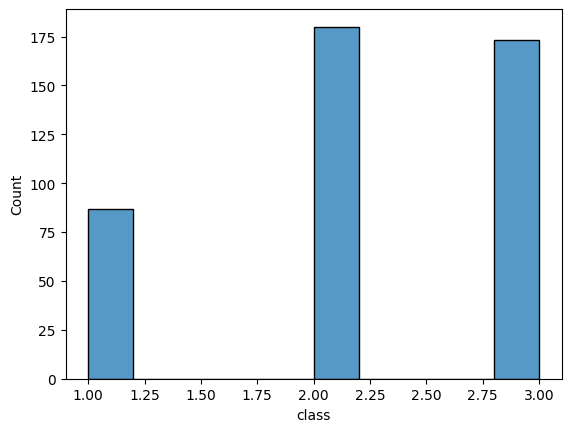

In [180]:
import seaborn as sns
sns.histplot(data=df, x="class")

In [181]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']].copy().to_numpy()
y=df[['class']].copy().to_numpy()

In [182]:
X.shape

(440, 7)

In [183]:
y.shape

(440, 1)

In [184]:
from sklearn.decomposition import PCA # principal component analysis
import matplotlib.pyplot as plt

# reducing features to just 2 features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(440, 2)

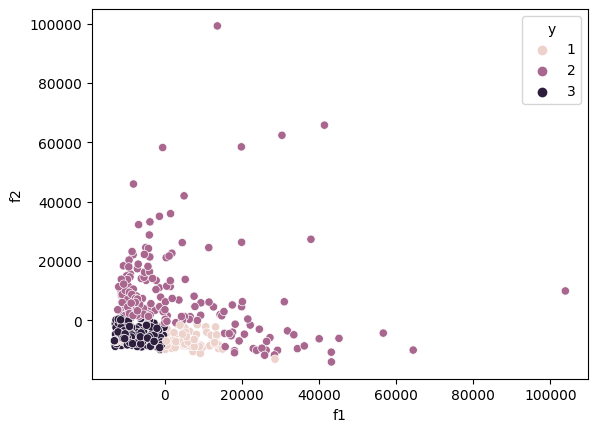

In [185]:
df2 = pd.DataFrame(X_pca,columns=['f1','f2'])
df2['y'] = y
sns.scatterplot(data=df2, x='f1', y='f2', hue='y')
plt.show()

In [186]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,\
                                                            test_size=0.25,random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,\
                                                            test_size=0.25,random_state=0)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


In [187]:
# standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [197]:
# implement kNN from scratch

def kNN(X,Y,query_point,K=5): # X is N x d matrix, query_point is 1 x d array
  N = X.shape[0]
  d = X.shape[1]

  # store the eucliedean distance and the labels together
  dist_labels = np.array([[np.sqrt(np.sum((query_point - X[i])**2)),Y[i][0]] for i in range(N)])
  #print(dist_labels.shape)

  # sort the distances and labels together
  dist_labels = dist_labels[dist_labels[:,0].argsort()]
  #print(dist_labels[:5,])

  # choose the top K distance and labels
  dist_labels_topK = dist_labels[:K,:]

  labels, counts = np.unique(dist_labels_topK[:,1],return_counts=True)

  index_maxcount = np.argmax(counts)
  pred_label = labels[index_maxcount]
  return int(pred_label)

In [198]:
y_train[0][0]

1

In [199]:
kNN(X_train,y_train,X_test[50],5)

3

In [207]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = np.zeros((X_test.shape[0],1))

for i in range(X_test.shape[0]):
  y_pred[i][0] = kNN(X_train, y_train, X_test[i],K=5)

target_names = ['class 1','class 2','class 3']
print(classification_report(y_test, y_pred, target_names=target_names, digits=2))

              precision    recall  f1-score   support

     class 1       0.76      0.64      0.70        25
     class 2       0.88      0.88      0.88        42
     class 3       0.81      0.88      0.84        43

    accuracy                           0.83       110
   macro avg       0.82      0.80      0.81       110
weighted avg       0.83      0.83      0.82       110

